# Using MOOE ratios, how can we group public schools and how can these clusters be used to improve MOOE allocation?

As an indicator, ratios are often more preferred than raw count data. One of the reasons is that raw count data often leave out important elements that could give an entirely different picture therefore we would be exploring the different ratios that could be used to stratify schools.


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D

Import datasets for cleaning

In [2]:
#school_master dataset
school_master = pd.read_csv("Masterlist of Schools.csv")
school_master

,school.id,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,101746.0,"Brgy. Dias Bautista, Pang",1/1/1930,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,102193.0,A.G. Tupaz,1/1/1944,Elementary,DepED Managed,Kinder & Elementary,Monograde,P 240 M or more but less than P 320 M,Component City,Partially Urban
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,101283.0,-,1/1/1945,Elementary,DepED Managed,Elementary,Monograde,P 55 M or more,NaN,Partially Urban
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,100216.0,Sucsuquen,1/1/1964,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,100043.0,None,1/1/1979,Elementary,DepED Managed,Elementary,Monograde,P 25 M or more but less than P 35 M,NaN,Partially Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46598,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,305308.0,"Boys Town Complex, Parang, Marikina City",1/1/1947,Secondary,DepED Managed,Secondary,Monograde,NaN,Highly Urbanized City,Urban
46599,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,320402.0,"Ruby st., Sta. Lucia Village Phase V",1/1/2003,Secondary,DepED Managed,Secondary,Monograde,P 400 M or more,Highly Urbanized City,Urban
46600,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,305315.0,"300 San Rafael St., San Miguel,",1/1/1923,Secondary,DepED Managed,Secondary,Monograde,NaN,Highly Urbanized City,Urban
46601,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,320407.0,F. Andaya St.,1/1/2008,Secondary,DepED Managed,Secondary,Monograde,P 400 M or more,Highly Urbanized City,Urban


In [3]:
#mooe dataset
mooe = pd.read_csv("MOOE data.csv")
mooe

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,"2,182,000.00"
1,134966,Agtangao ES,376,Elementary,"227,000.00"
2,134967,Bacsil ES,218,Elementary,"144,000.00"
3,134968,Bangued East CS,443,Elementary,"339,000.00"
4,134969,Bangued North ES,307,Elementary,"178,000.00"
...,...,...,...,...,...
44023,131231,J. Hector Lacson ES,340,Elementary,"180,000.00"
44024,131233,Kalandagan ES,420,Elementary,"248,000.00"
44025,131236,Ma. Z. Bayya ES,481,Elementary,"242,000.00"
44026,131237,New Isabela Central Elementary School,1895,Elementary,"841,000.00"


In [4]:
# rooms dataset
rooms = pd.read_csv("Rooms data.csv")
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46412 entries, 0 to 46411
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School ID                   46412 non-null  int64  
 1   rooms.standard.academic     46412 non-null  int64  
 2   rooms.standard.unused       46412 non-null  int64  
 3   rooms.nonstandard.academic  46408 non-null  float64
 4   rooms.nonstandard.unused    46408 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.8 MB


In [5]:
#check for duplicates
rooms[rooms["School ID"].duplicated(keep=False)]

,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused


In [6]:
#teachers dataset
teachers = pd.read_csv("Teachers data.csv")
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45040 entries, 0 to 45039
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   school.id            45040 non-null  int64
 1   teachers.instructor  45040 non-null  int64
 2   teachers.mobile      45040 non-null  int64
 3   teachers.regular     45040 non-null  int64
 4   teachers.sped        45040 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [7]:
#teachers check for duplicate
teachers[teachers["school.id"].duplicated(keep=False)]

,school.id,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped


In [8]:
mooe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school.id          44028 non-null  int64 
 1   school.name        44028 non-null  object
 2   school.enrollment  44028 non-null  int64 
 3   school.offering    44028 non-null  object
 4    school.mooe       44028 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [9]:
#check for duplicates
mooe[mooe["school.id"] . duplicated(keep=False)]

,school.id,school.name,school.enrollment,school.offering,school.mooe


In [10]:
mooe[mooe["school.name"].duplicated(keep=False)]

,school.id,school.name,school.enrollment,school.offering,school.mooe
2,134967,Bacsil ES,218,Elementary,"144,000.00"
14,134976,Sinapangan ES,385,Elementary,"220,000.00"
15,218505,Sta. Rosa PS,23,Elementary,"49,000.00"
19,134980,Calaba ES,328,Elementary,"185,000.00"
23,134984,San Antonio ES,173,Elementary,"131,000.00"
...,...,...,...,...,...
44004,131228,San Rafael ES,134,Elementary,"117,000.00"
44005,131229,Tina ES,266,Elementary,"157,000.00"
44008,131223,Buenaflor ES,338,Elementary,"229,000.00"
44012,131227,San Antonio ES,174,Elementary,"122,000.00"


In [11]:
#change the school.mooe from string to float
mooe[' school.mooe '] = mooe[' school.mooe '].str.replace(',','')
mooe[' school.mooe '] = mooe[' school.mooe '].astype('float')
mooe

,school.id,school.name,school.enrollment,school.offering,school.mooe
0,305075,Abra HS,2481,Secondary,2182000.0
1,134966,Agtangao ES,376,Elementary,227000.0
2,134967,Bacsil ES,218,Elementary,144000.0
3,134968,Bangued East CS,443,Elementary,339000.0
4,134969,Bangued North ES,307,Elementary,178000.0
...,...,...,...,...,...
44023,131231,J. Hector Lacson ES,340,Elementary,180000.0
44024,131233,Kalandagan ES,420,Elementary,248000.0
44025,131236,Ma. Z. Bayya ES,481,Elementary,242000.0
44026,131237,New Isabela Central Elementary School,1895,Elementary,841000.0


In [12]:
school_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

In [13]:
#Drop duplicates but there are no duplicates
school_master= school_master.drop_duplicates()
school_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school.id               46603 non-null  int64  
 1   school.name             46603 non-null  object 
 2   school.region           46603 non-null  object 
 3   school.region.name      46603 non-null  object 
 4   school.province         46603 non-null  object 
 5   school.cityhall         46602 non-null  object 
 6   school.division         46603 non-null  object 
 7   school.citymuni         46603 non-null  object 
 8   school.district         46603 non-null  object 
 9   school.legdistrict      46603 non-null  object 
 10  school.type             46603 non-null  object 
 11  school.abbrev           18167 non-null  object 
 12  school.previousname     42221 non-null  object 
 13  school.mother.id        46596 non-null  float64
 14  school.address          44621 non-null

### Merging Dataframes

In [14]:
school_merged = pd.merge(school_master, mooe, on="school.id")
school_merged.shape

(44025, 27)

In [15]:
school_merged2=school_merged.merge(rooms, left_on= "school.id", right_on = "School ID", how="left")
school_merged2.shape

(44025, 32)

In [16]:
school_merged3=school_merged2.merge(teachers, left_on= "school.id", right_on = "school.id", how="left")
school_merged3.shape

(44025, 36)

In [17]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44025 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   44025 non-null  int64  
 1   school.name_x               44025 non-null  object 
 2   school.region               44025 non-null  object 
 3   school.region.name          44025 non-null  object 
 4   school.province             44025 non-null  object 
 5   school.cityhall             44024 non-null  object 
 6   school.division             44025 non-null  object 
 7   school.citymuni             44025 non-null  object 
 8   school.district             44025 non-null  object 
 9   school.legdistrict          44025 non-null  object 
 10  school.type                 44025 non-null  object 
 11  school.abbrev               17461 non-null  object 
 12  school.previousname         39810 non-null  object 
 13  school.mother.id            440

## Visualization of key count data

The usual count data that people look to in schools are the number of students, number of treachers, number of rooms and the budget.
For this, we will be focusing on the following variables
 schol.mooe - The MOOE budhet of schoold
school.enrollment - for the number of students
rooms.standard.academic - this is the number of used that fit to the propper specification of DepEd, we choose this data because we would focus on the ideal setup
teachers.regular - for the number of regular teachers.

In [18]:
#drop missing values in the target columns
school_merged3=school_merged3[school_merged3['teachers.regular'].notna()]
school_merged3.info()#44025-42523

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42523 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42523 non-null  int64  
 1   school.name_x               42523 non-null  object 
 2   school.region               42523 non-null  object 
 3   school.region.name          42523 non-null  object 
 4   school.province             42523 non-null  object 
 5   school.cityhall             42522 non-null  object 
 6   school.division             42523 non-null  object 
 7   school.citymuni             42523 non-null  object 
 8   school.district             42523 non-null  object 
 9   school.legdistrict          42523 non-null  object 
 10  school.type                 42523 non-null  object 
 11  school.abbrev               16782 non-null  object 
 12  school.previousname         38604 non-null  object 
 13  school.mother.id            425

In [19]:
#drop missing values in the target columns
school_merged3=school_merged3[school_merged3['rooms.standard.academic'].notna()]
school_merged3.info()#42523-42346

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42346 entries, 0 to 44024
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42346 non-null  int64  
 1   school.name_x               42346 non-null  object 
 2   school.region               42346 non-null  object 
 3   school.region.name          42346 non-null  object 
 4   school.province             42346 non-null  object 
 5   school.cityhall             42345 non-null  object 
 6   school.division             42346 non-null  object 
 7   school.citymuni             42346 non-null  object 
 8   school.district             42346 non-null  object 
 9   school.legdistrict          42346 non-null  object 
 10  school.type                 42346 non-null  object 
 11  school.abbrev               16704 non-null  object 
 12  school.previousname         38537 non-null  object 
 13  school.mother.id            423

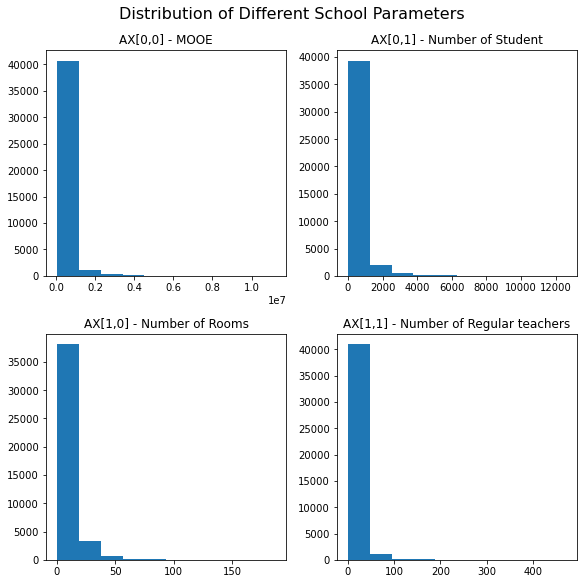

In [20]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

axes[0,0].hist(school_merged3[" school.mooe "]) 
axes[0,0].set_title("AX[0,0] - MOOE")
axes[0,1].hist(school_merged3["school.enrollment"]) 
axes[0,1].set_title('AX[0,1] - Number of Student')
axes[1,0].hist(school_merged3["rooms.standard.academic"]) 
axes[1,0].set_title('AX[1,0] - Number of Rooms')
axes[1,1].hist(school_merged3["teachers.regular"]) 
axes[1,1].set_title('AX[1,1] - Number of Regular teachers')

fig.suptitle('Distribution of Different School Parameters', fontsize=16)
plt.show()

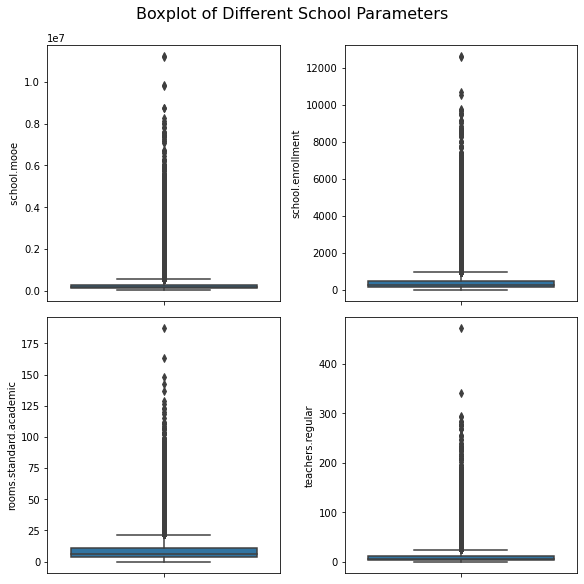

In [21]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_merged3, y=' school.mooe ')
sns.boxplot(ax=axes[0, 1], data=school_merged3, y='school.enrollment')
sns.boxplot(ax=axes[1, 0], data=school_merged3, y='rooms.standard.academic')
sns.boxplot(ax=axes[1, 1], data=school_merged3, y='teachers.regular')

fig.suptitle('Boxplot of Different School Parameters', fontsize=16)
plt.show()

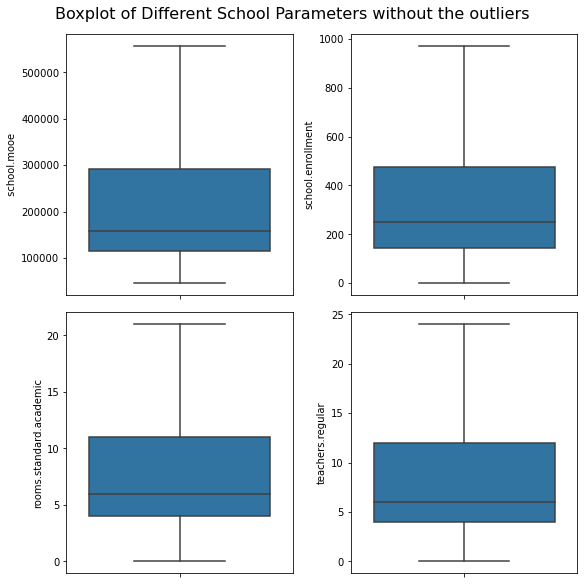

In [22]:
#first we will look into the distribution of this different count data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_merged3, y=' school.mooe ', showfliers = False)
sns.boxplot(ax=axes[0, 1], data=school_merged3, y='school.enrollment', showfliers = False)
sns.boxplot(ax=axes[1, 0], data=school_merged3, y='rooms.standard.academic', showfliers = False)
sns.boxplot(ax=axes[1, 1], data=school_merged3, y='teachers.regular', showfliers = False)

fig.suptitle('Boxplot of Different School Parameters without the outliers', fontsize=16)
plt.show()

<Figure size 720x576 with 0 Axes>

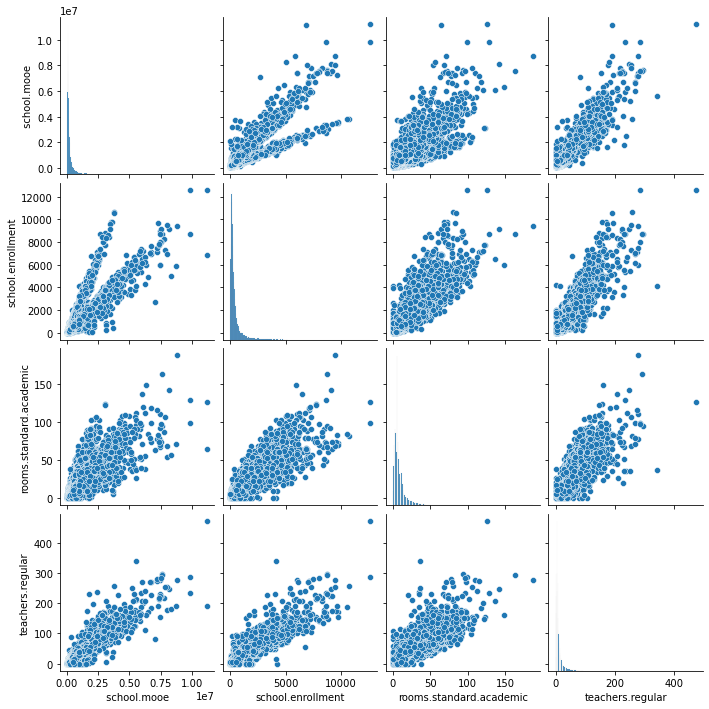

In [23]:
#pairwise scatter plot for the different variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = [' school.mooe ', 'school.enrollment', 'rooms.standard.academic', 'teachers.regular'], data = school_merged3)

plt.show()

### Creating features

In [24]:
school_merged3['student.teacher']=school_merged3['school.enrollment']/school_merged3['teachers.regular']

In [25]:
school_merged3['student.rooms']=school_merged3['school.enrollment']/school_merged3['rooms.standard.academic']

In [26]:
school_merged3['mooe.student']=school_merged3[' school.mooe ']/school_merged3['school.enrollment']

In [27]:
school_merged3['mooe.teacher']=school_merged3[' school.mooe ']/school_merged3['teachers.regular']

In [28]:
school_merged3['mooe.rooms']=school_merged3[' school.mooe ']/school_merged3['rooms.standard.academic']

In [29]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42346 entries, 0 to 44024
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   42346 non-null  int64  
 1   school.name_x               42346 non-null  object 
 2   school.region               42346 non-null  object 
 3   school.region.name          42346 non-null  object 
 4   school.province             42346 non-null  object 
 5   school.cityhall             42345 non-null  object 
 6   school.division             42346 non-null  object 
 7   school.citymuni             42346 non-null  object 
 8   school.district             42346 non-null  object 
 9   school.legdistrict          42346 non-null  object 
 10  school.type                 42346 non-null  object 
 11  school.abbrev               16704 non-null  object 
 12  school.previousname         38537 non-null  object 
 13  school.mother.id            423

### Cleaning new features

In [30]:
cols = school_merged3.columns

In [31]:
school_merged3[ school_merged3[cols[36]] == np.inf].index

Int64Index([  263,   279,   414,  1409,  2432,  2521,  2997,  3436,  3882,
             3887,
            ...
            43688, 43695, 43729, 43734, 43740, 43756, 43804, 43815, 44000,
            44009],
           dtype='int64', length=518)

In [32]:
# drop rows with 0 teachers

school_merged3.drop( school_merged3[ school_merged3[cols[36]] == np.inf].index , inplace=True)#removed 359

In [33]:
school_merged3[ school_merged3[cols[36]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms


In [34]:
school_merged3[ school_merged3[cols[37]] == np.inf].index

Int64Index([  213,   676,   919,  1088,  1091,  1114,  1521,  1689,  1692,
             2108,
            ...
            43388, 43424, 43530, 43558, 43662, 43744, 43776, 43794, 43872,
            43986],
           dtype='int64', length=555)

In [35]:
# drop rows with 0 rooms

school_merged3.drop( school_merged3[ school_merged3[cols[37]] == np.inf].index , inplace=True)#removed 555

In [36]:
school_merged3[ school_merged3[cols[38]] == np.inf]

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms
28989,126484,Sagasaan ES,Region X,Northern Mindanao,BUKIDNON,BUKIDNON,Bukidnon,KITAOTAO,Kitaotao II,3rd District,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,inf,29000.0,38666.666667
33740,131473,Marcos Calo ES,CARAGA,CARAGA,AGUSAN DEL NORTE,AGUSAN DEL NORTE,Agusan del Norte,LAS NIEVES,Las Nieves East,1st District,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,inf,31000.0,25833.333333


In [37]:
# drop rows with 0 students

school_merged3.drop( school_merged3[ school_merged3[cols[38]] == np.inf].index , inplace=True)#removed 2

In [38]:
school_merged3[ school_merged3[cols[39]] == np.inf].index

Int64Index([], dtype='int64')

In [39]:
school_merged3[ school_merged3[cols[40]] == np.inf].index

Int64Index([], dtype='int64')

In [40]:
school_merged3.describe()

,school.id,school.mother.id,school.enrollment,school.mooe,School ID,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms
count,41271.000000,41271.000000,41271.000000,4.127100e+04,41271.000000,41271.000000,41271.000000,41270.000000,41270.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,41271.000000,4.127100e+04,41271.000000
mean,146475.557292,146475.557292,469.747038,3.096662e+05,146475.557292,9.320516,0.154709,0.192707,0.002956,0.002423,1.031184,11.638317,0.047612,40.897139,46.409940,823.527275,3.005212e+04,34305.088308
std,66177.325590,66177.325590,713.064125,4.969116e+05,66177.325590,10.111449,0.711483,1.038039,0.073284,0.102991,2.689942,17.614149,0.743137,19.622948,27.582431,610.252992,1.797678e+04,22455.126627
min,100001.000000,100001.000000,3.000000,4.800000e+04,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.875000,1.400000,172.376874,3.888889e+03,10333.333333
25%,110561.500000,110561.500000,147.000000,1.160000e+05,110561.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,30.500000,31.818182,534.942998,2.183333e+04,22000.000000
50%,121083.000000,121083.000000,255.000000,1.600000e+05,121083.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,38.909091,41.200000,675.126904,2.575000e+04,26166.666667
75%,131808.500000,131808.500000,482.000000,2.960000e+05,131808.500000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,48.000000,53.000000,941.666667,3.350000e+04,39400.000000
max,325106.000000,325106.000000,12613.000000,1.121800e+07,325106.000000,187.000000,15.000000,74.000000,7.000000,10.000000,104.000000,472.000000,89.000000,1570.000000,1223.000000,39857.142857,1.385000e+06,991000.000000


In [41]:
school_merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   school.id                   41271 non-null  int64  
 1   school.name_x               41271 non-null  object 
 2   school.region               41271 non-null  object 
 3   school.region.name          41271 non-null  object 
 4   school.province             41271 non-null  object 
 5   school.cityhall             41270 non-null  object 
 6   school.division             41271 non-null  object 
 7   school.citymuni             41271 non-null  object 
 8   school.district             41271 non-null  object 
 9   school.legdistrict          41271 non-null  object 
 10  school.type                 41271 non-null  object 
 11  school.abbrev               16247 non-null  object 
 12  school.previousname         37752 non-null  object 
 13  school.mother.id            412

In [42]:
# get the target features
school_newf = school_merged3[['school.id', 'student.teacher', 'student.rooms', 'mooe.student', 'mooe.teacher', 'mooe.rooms']]

In [43]:
#check for missing values
school_newf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 44024
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school.id        41271 non-null  int64  
 1   student.teacher  41271 non-null  float64
 2   student.rooms    41271 non-null  float64
 3   mooe.student     41271 non-null  float64
 4   mooe.teacher     41271 non-null  float64
 5   mooe.rooms       41271 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.2 MB


## Visualization for the created feature

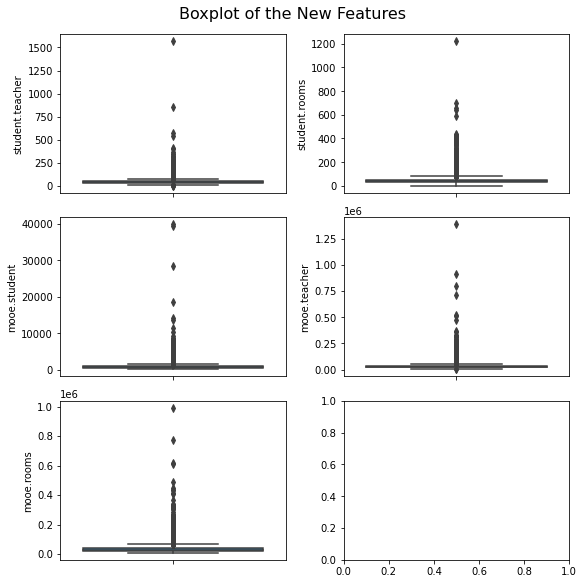

In [44]:
#we will look into the distribution of the new features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_newf, y='student.teacher')
sns.boxplot(ax=axes[0, 1], data=school_newf, y='student.rooms')
sns.boxplot(ax=axes[1, 0], data=school_newf, y='mooe.student')
sns.boxplot(ax=axes[1, 1], data=school_newf, y='mooe.teacher')
sns.boxplot(ax=axes[2, 0], data=school_newf, y='mooe.rooms')

fig.suptitle('Boxplot of the New Features', fontsize=16)
plt.show()

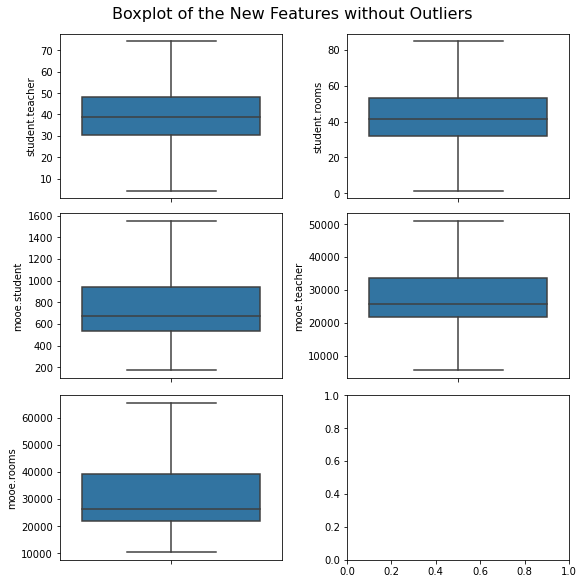

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8),  constrained_layout=True)

sns.boxplot(ax=axes[0, 0], data=school_newf, y='student.teacher', showfliers = False)
sns.boxplot(ax=axes[0, 1], data=school_newf, y='student.rooms', showfliers = False)
sns.boxplot(ax=axes[1, 0], data=school_newf, y='mooe.student', showfliers = False)
sns.boxplot(ax=axes[1, 1], data=school_newf, y='mooe.teacher', showfliers = False)
sns.boxplot(ax=axes[2, 0], data=school_newf, y='mooe.rooms', showfliers = False)

fig.suptitle('Boxplot of the New Features without Outliers', fontsize=16)
plt.show()

<Figure size 720x576 with 0 Axes>

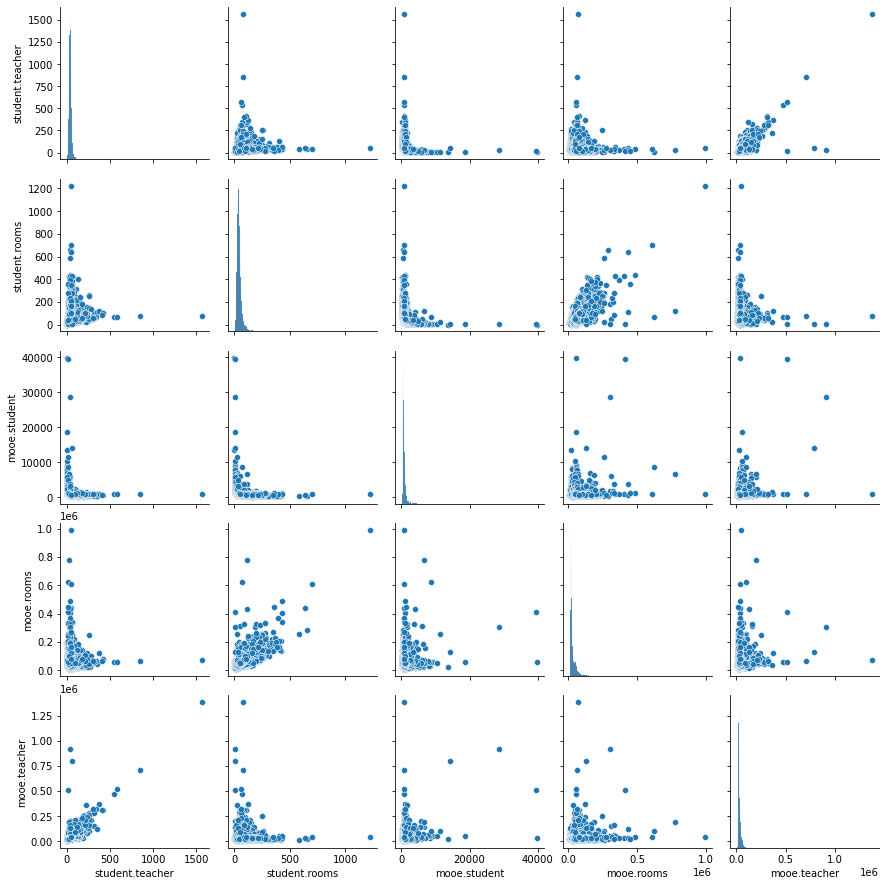

In [46]:
#pairwise scatter plot for the new variables
plt.figure(figsize=(10,8))

sns.pairplot(vars = ['student.teacher', 'student.rooms', 'mooe.student', 'mooe.rooms', 'mooe.teacher'], data = school_newf)

plt.show()

We decided not to remove the outliers since they are also an important segment of the schools

### Visualize

3D Visualization

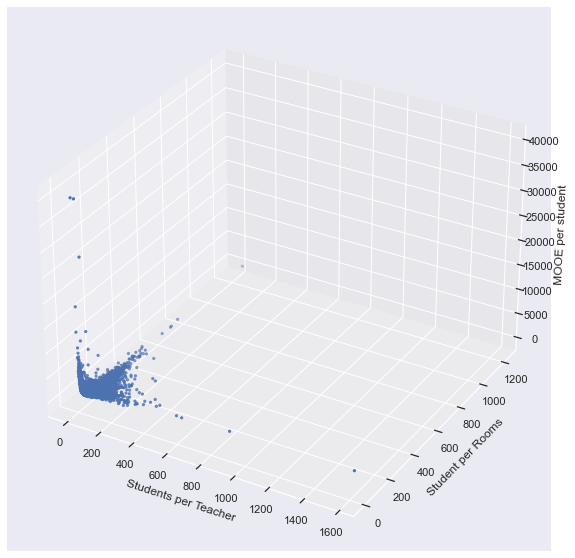

In [47]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newf['student.teacher']
y = school_newf['student.rooms']
z = school_newf['mooe.student']

ax.set_xlabel("Students per Teacher")
ax.set_ylabel("Student per Rooms")
ax.set_zlabel("MOOE per student")

ax.scatter(x, y, z, s=5)

plt.show()

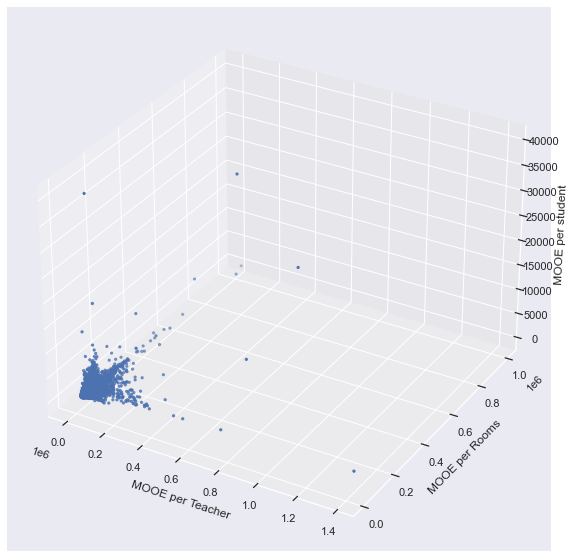

In [48]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = school_newf['mooe.teacher']
y = school_newf['mooe.rooms']
z = school_newf['mooe.student']

ax.set_xlabel("MOOE per Teacher")
ax.set_ylabel("MOOE per Rooms")
ax.set_zlabel("MOOE per student")

ax.scatter(x, y, z, s=5)

plt.show()

## Modeling

#### creating codes for kmeans

In [49]:
#scaler
from sklearn.preprocessing import StandardScaler
def stdScaler(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [50]:
# elbow method
from sklearn.cluster import KMeans

def kMeansClustering(scaled_df):
    ssd = []
    range_n_clusters = list(np.arange(1,16))

    # running kmeans with different n
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, random_state=2) #random state para you can run it with other machines (reproducing the pagka-random nya)
        kmeans.fit(scaled_df)

        ssd.append(kmeans.inertia_)
    # inertia: sum of squared errors (where error = distance of centroid from a point)
    # kinukuha nya inertia for each value of k

    # plot the SSDs for each n_clusters
    plt.plot(ssd)

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
def getSilhouettes(scaled_df):
    range_n_clusters = list(np.arange(2,9))

    for num_clusters in range_n_clusters:

        # intialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, random_state=2)
        kmeans.fit(scaled_df)

        cluster_labels = kmeans.predict(scaled_df)

        # silhouette score; how far they are apart
        silhouette_avg = silhouette_score(scaled_df, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

#### Using the code made, Kmeans will be done for the different combination of feature

In [52]:
cols = school_newf.columns
cols

Index(['school.id', 'student.teacher', 'student.rooms', 'mooe.student',
       'mooe.teacher', 'mooe.rooms'],
      dtype='object')

In [53]:
var1=cols[1]
var2=cols[2]
var3=cols[3]
var4=cols[4]
var5=cols[5]

The grouping that will be tested are:
student.teacher, student.rooms, mooe.student (1,2,3)
mooe.student, mooe.rooms, mooe.teacher (3,4,5)


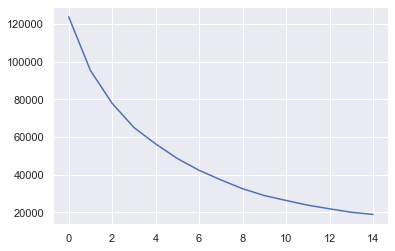

In [54]:
kMeansClustering(stdScaler(school_newf[[var1, var2, var3]]))

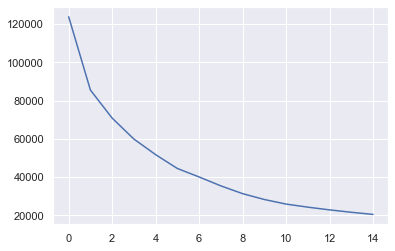

In [55]:
kMeansClustering(stdScaler(school_newf[[var3, var4, var5]]))

In [56]:
getSilhouettes(stdScaler(school_newf[[var1, var2, var3]]))

For n_clusters=2, the silhouette score is 0.3537924534333263
For n_clusters=3, the silhouette score is 0.4765987388130191
For n_clusters=4, the silhouette score is 0.3459579465577704
For n_clusters=5, the silhouette score is 0.3474738460622268
For n_clusters=6, the silhouette score is 0.3541084215226423
For n_clusters=7, the silhouette score is 0.3263098950566533
For n_clusters=8, the silhouette score is 0.3229909036867733


In [57]:
getSilhouettes(stdScaler(school_newf[[var3, var4, var5]]))

For n_clusters=2, the silhouette score is 0.5864824475740374
For n_clusters=3, the silhouette score is 0.5826393464776396
For n_clusters=4, the silhouette score is 0.5654031997594393
For n_clusters=5, the silhouette score is 0.54888083322482
For n_clusters=6, the silhouette score is 0.553061861128381
For n_clusters=7, the silhouette score is 0.5536793642557842
For n_clusters=8, the silhouette score is 0.5226204370453917


In the two groupings that was made, the group that shows higher Silhouettes is the ratios in respect to MOOE therefore the group focuses on this

In [58]:
#to produce clusters
def produceClusters(n_clusters, scaled_df, random_state=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(scaled_df)
    return kmeans.predict(scaled_df)

In [59]:
#create scaled datasets
mooe = stdScaler(school_newf[[var3, var4, var5]])

we look into n_cluster=3 and n_cluster=4 to account for outliers

In [60]:
cluster3 = school_newf.copy()
cluster3['cluster_labels'] = produceClusters(3,mooe)
cluster3['cluster_labels'].value_counts()

0    32128
1     9137
2        6
Name: cluster_labels, dtype: int64

In [61]:
cluster4 = school_newf.copy()
cluster4['cluster_labels'] = produceClusters(4,mooe)
cluster4['cluster_labels'].value_counts()

0    31132
2     9087
1     1047
3        5
Name: cluster_labels, dtype: int64

In [64]:
def boxPlot(scaled_df, showfliers=True):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,7))

    #sns.boxplot(x="Cluster_Labels", y="", data=scaled_df, ax=axes[0,0])
    #axes[0,0].set_title("Enrolment", fontsize=16)

    sns.boxplot(x=scaled_df.cluster_labels, y=scaled_df["mooe.student"], ax=axes[0], showfliers=showfliers)
    axes[0].set_title("MOOE per student", fontsize=22)
    axes[0].set_ylabel("value", fontsize=18)
    axes[0].set_xlabel("cluster label", fontsize=18)
    axes[0].tick_params(axis='x', labelsize=16)
    axes[0].tick_params(axis='y', labelsize=14)

    sns.boxplot(x=scaled_df.cluster_labels, y=scaled_df["mooe.student"], ax=axes[1], showfliers=showfliers)
    axes[1].set_title("MOOE per teacher", fontsize=22)
    axes[1].set_ylabel("value", fontsize=18)
    axes[1].set_xlabel("cluster label", fontsize=18)
    axes[1].tick_params(axis='x', labelsize=16)
    axes[1].tick_params(axis='y', labelsize=14)

    sns.boxplot(x=scaled_df.cluster_labels, y=scaled_df["mooe.rooms"], ax=axes[2], showfliers=showfliers)
    axes[2].set_title("MOOE per room", fontsize=22)
    axes[2].set_ylabel("value", fontsize=18)
    axes[2].set_xlabel("cluster label", fontsize=18)
    axes[2].tick_params(axis='x', labelsize=16)
    axes[2].tick_params(axis='y', labelsize=14)

    plt.tight_layout()
    plt.show();

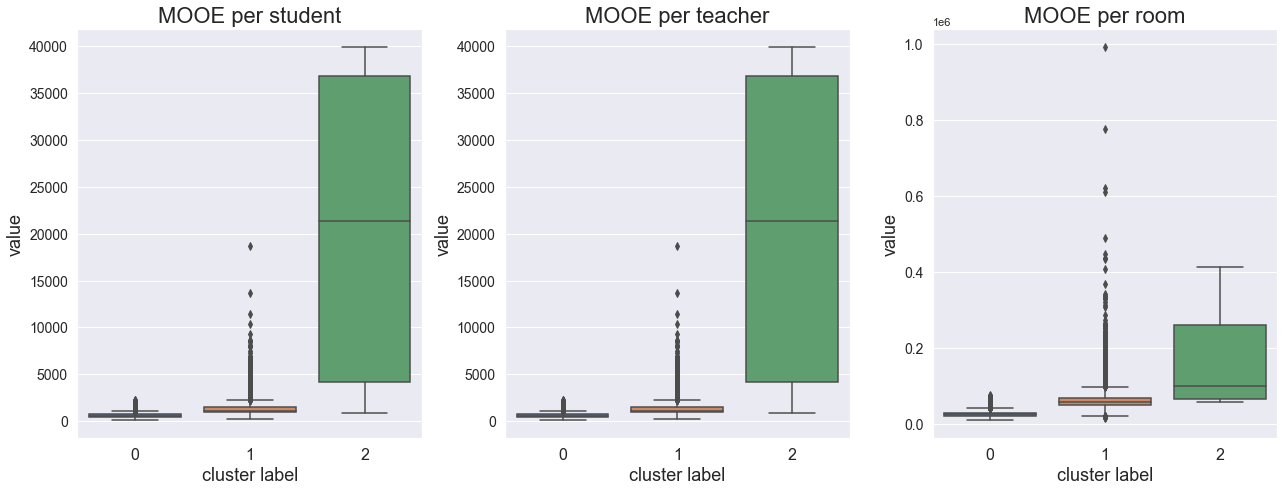

In [65]:
boxPlot(cluster3)

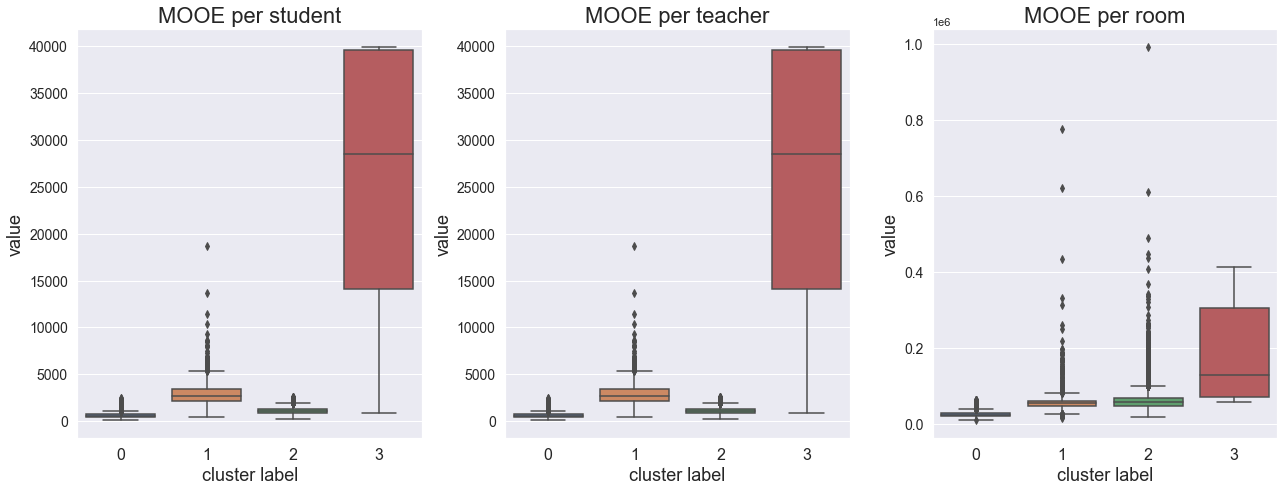

In [66]:
boxPlot(cluster4)

Comparing the two, the cluster that shows a more discernible grouping is n_cluster=4

Better visualize cluster 0-2 to see the difference 

In [67]:
#remove first the cluster label 3
cluster4_0to2 = cluster4[cluster4['cluster_labels'] != 3]

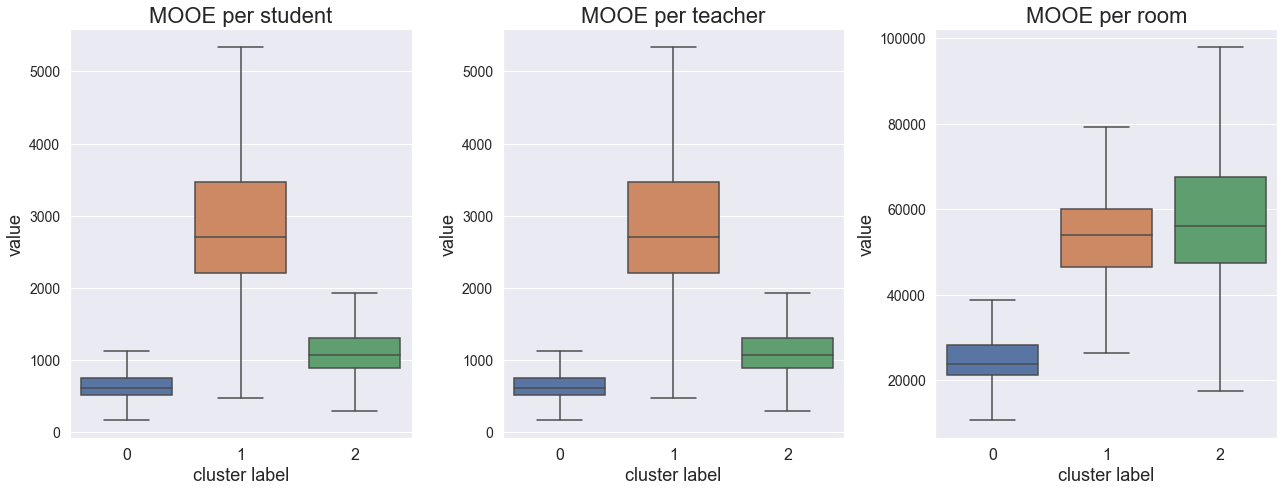

In [68]:
#check the boxplot
boxPlot(cluster4_0to2, False)

In [69]:
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}

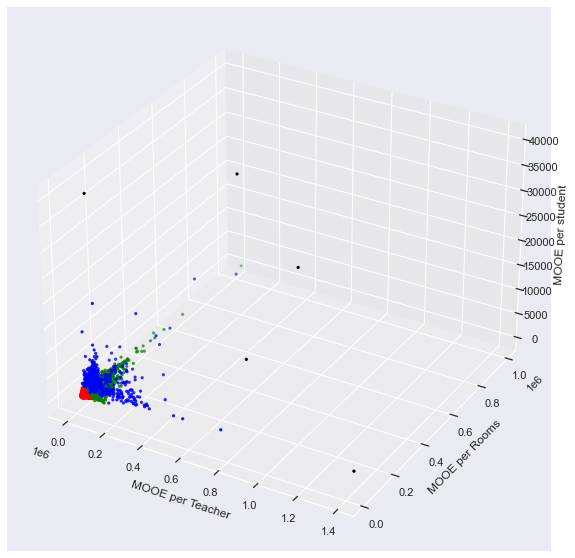

In [70]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

x = cluster4['mooe.teacher']
y = cluster4['mooe.rooms']
z = cluster4['mooe.student']

ax.set_xlabel("MOOE per Teacher")
ax.set_ylabel("MOOE per Rooms")
ax.set_zlabel("MOOE per student")

ax.scatter(x, y, z, s=5, c=cluster4['cluster_labels'].apply(lambda x: colors[x]))

plt.show()

### Analyze the 4 clusters

In [71]:
#join cluster4 with school_master to be segmented
analysis = pd.merge(cluster4, school_master, on='school.id')

In [72]:
#segment the dataframe by cluster labels
analysis_c0 = analysis[analysis["cluster_labels"]==0]
analysis_c1 = analysis[analysis["cluster_labels"]==1]
analysis_c2 = analysis[analysis["cluster_labels"]==2]
analysis_c3 = analysis[analysis["cluster_labels"]==3]

In [73]:
analysis_c0.describe()

,school.id,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms,cluster_labels,school.mother.id
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.0,31132.000000
mean,120037.402223,40.828392,42.428050,659.711425,25096.511597,25570.566838,0.0,120037.402223
std,20924.740604,12.920167,17.560722,217.852326,5981.066765,6581.898185,0.0,20924.740604
min,100002.000000,4.388889,7.333333,172.376874,3888.888889,10333.333333,0.0,100002.000000
25%,108455.750000,31.750000,31.166667,508.903589,21000.000000,21166.666667,0.0,108455.750000
50%,117215.500000,39.833333,39.500000,605.882353,23800.000000,23750.000000,0.0,117215.500000
75%,126664.250000,48.333333,49.250000,754.491018,27800.000000,28250.000000,0.0,126664.250000
max,320101.000000,186.800000,191.111111,2464.285714,70000.000000,62214.285714,0.0,320101.000000


In [74]:
analysis_c1.describe()

,school.id,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms,cluster_labels,school.mother.id
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.0,1047.000000
mean,176899.744031,36.738209,24.571126,3000.928095,70706.134554,58074.537327,1.0,176899.744031
std,79235.387805,61.933356,22.709470,1436.800542,53631.547194,42102.910470,0.0,79235.387805
min,100031.000000,2.000000,1.600000,478.125000,13333.333333,16000.000000,1.0,100031.000000
25%,119859.500000,14.000000,12.000000,2211.309524,52000.000000,46500.000000,1.0,119859.500000
50%,135063.000000,20.000000,18.000000,2703.703704,57000.000000,54000.000000,1.0,135063.000000
75%,219521.000000,28.000000,26.000000,3464.102564,64752.136752,60000.000000,1.0,219521.000000
max,324101.000000,851.000000,251.500000,18666.666667,712000.000000,776500.000000,1.0,324101.000000


In [75]:
analysis_c2.describe()

,school.id,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms,cluster_labels,school.mother.id
count,9087.000000,9087.000000,9087.000000,9087.000000,9087.000000,9087.000000,9087.0,9087.000000
mean,233455.225047,41.450345,62.581559,1120.798324,41961.542478,61403.110180,2.0,233455.225047
std,87096.946452,21.806578,44.362832,357.160664,14817.975967,29190.256881,0.0,87096.946452
min,100001.000000,4.015385,9.000000,289.240319,9707.692308,17500.000000,2.0,100001.000000
25%,126836.000000,28.707764,40.000000,894.645094,32764.705882,47375.000000,2.0,126836.000000
50%,300932.000000,36.769231,52.000000,1068.796069,38480.000000,56000.000000,2.0,300932.000000
75%,303663.500000,47.323043,69.583791,1311.489917,47500.000000,67600.000000,2.0,303663.500000
max,325106.000000,347.000000,1223.000000,2592.592593,135000.000000,991000.000000,2.0,325106.000000


In [76]:
analysis_c3.describe()

,school.id,student.teacher,student.rooms,mooe.student,mooe.teacher,mooe.rooms,cluster_labels,school.mother.id
count,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.0,5.000000
mean,313331.400000,334.425000,21.993333,24598.399086,7.285250e+05,193662.000000,3.0,313331.400000
std,8984.366355,691.024136,31.814361,16917.788558,4.991287e+05,157073.889364,0.0,8984.366355
min,300040.000000,0.875000,1.400000,882.165605,3.487500e+04,55800.000000,3.0,300040.000000
25%,307906.000000,13.000000,9.000000,14128.888889,5.145000e+05,69250.000000,3.0,307906.000000
50%,319506.000000,32.000000,10.400000,28546.875000,7.947500e+05,127160.000000,3.0,319506.000000
75%,319602.000000,56.250000,10.666667,39576.923077,9.135000e+05,304500.000000,3.0,319602.000000
max,319603.000000,1570.000000,78.500000,39857.142857,1.385000e+06,411600.000000,3.0,319603.000000


Group by school classification (elementary or secondary)

In [77]:
analysis_c0['school.classification'].value_counts()

Elementary    30951
Secondary       181
Name: school.classification, dtype: int64

In [78]:
analysis_c1['school.classification'].value_counts()

Elementary    797
Secondary     250
Name: school.classification, dtype: int64

In [79]:
analysis_c2['school.classification'].value_counts()

Secondary     5383
Elementary    3704
Name: school.classification, dtype: int64

In [80]:
analysis_c3['school.classification'].value_counts()

Secondary    5
Name: school.classification, dtype: int64

In [81]:
analysis_c0[ 'school.province' ] . value_counts() . sort_values(ascending=False)

PANGASINAN           1136
CEBU                 1091
LEYTE                1031
ILOILO                970
NEGROS OCCIDENTAL     938
                     ... 
SIQUIJOR               64
CAMIGUIN               52
CITY OF ISABELA        40
CITY OF COTABATO       26
BATANES                12
Name: school.province, Length: 81, dtype: int64

In [82]:
analysis_c1[ 'school.province' ] . value_counts() . sort_values(ascending=False)

LEYTE                 82
BENGUET               53
BOHOL                 52
EASTERN SAMAR         51
WESTERN SAMAR         41
                      ..
SOUTH COTABATO         1
NCR THIRD DISTRICT     1
ROMBLON                1
CAMIGUIN               1
CAVITE                 1
Name: school.province, Length: 76, dtype: int64

In [83]:
analysis_c2[ 'school.province' ] . value_counts() . sort_values(ascending=False)

WESTERN SAMAR       413
LEYTE               308
PANGASINAN          307
CEBU                293
ILOILO              255
                   ... 
CAMIGUIN             11
CITY OF COTABATO      8
CITY OF ISABELA       8
SIQUIJOR              8
BATANES               2
Name: school.province, Length: 81, dtype: int64

In [84]:
analysis_c3[ 'school.province' ] . value_counts() . sort_values(ascending=False)

NCR FOURTH DISTRICT    2
ILOCOS SUR             1
NCR SECOND DISTRICT    1
LAGUNA                 1
Name: school.province, dtype: int64

In [85]:
analysis_c0[ 'school.urban' ] . value_counts() . sort_values(ascending=False)

Partially Urban    27151
Urban               2670
Rural               1309
Name: school.urban, dtype: int64

In [86]:
analysis_c1[ 'school.urban' ] . value_counts() . sort_values(ascending=False)

Partially Urban    908
Rural              111
Urban               28
Name: school.urban, dtype: int64

In [87]:
analysis_c2[ 'school.urban' ] . value_counts() . sort_values(ascending=False)

Partially Urban    7770
Urban               808
Rural               508
Name: school.urban, dtype: int64

In [88]:
analysis_c3[ 'school.urban' ] . value_counts() . sort_values(ascending=False)

Urban              4
Partially Urban    1
Name: school.urban, dtype: int64

In [89]:
analysis_c0[ 'school.cityincome' ] . value_counts() . sort_values(ascending=False)

P 55 M or more                           8933
P 25 M or more but less than P 35 M      5108
P 35 M or more but less than P 45 M      4852
P 45 M or more but less than P 55 M      3811
P 15 M or more but less than P 25 M      2455
P 400 M or more                          2411
P 240 M or more but less than P 320 M    1205
P 160 M or more but less than P 240 M     920
P 320 M or more but less than P 400 M     673
Below P 15 M                               98
Special Class                              94
P 80 M or more but less than P 160 M       59
Name: school.cityincome, dtype: int64

In [90]:
analysis_c1[ 'school.cityincome' ] . value_counts() . sort_values(ascending=False)

P 25 M or more but less than P 35 M      297
P 15 M or more but less than P 25 M      181
P 55 M or more                           180
P 35 M or more but less than P 45 M      138
P 45 M or more but less than P 55 M      127
P 400 M or more                           29
P 240 M or more but less than P 320 M     26
Below P 15 M                              20
P 160 M or more but less than P 240 M     17
P 320 M or more but less than P 400 M      6
P 80 M or more but less than P 160 M       2
Name: school.cityincome, dtype: int64

In [91]:
analysis_c2[ 'school.cityincome' ] . value_counts() . sort_values(ascending=False)

P 55 M or more                           2432
P 25 M or more but less than P 35 M      1745
P 35 M or more but less than P 45 M      1350
P 45 M or more but less than P 55 M      1113
P 15 M or more but less than P 25 M       785
P 400 M or more                           740
P 240 M or more but less than P 320 M     308
P 160 M or more but less than P 240 M     182
P 320 M or more but less than P 400 M     140
Special Class                              49
Below P 15 M                               33
P 80 M or more but less than P 160 M       19
Name: school.cityincome, dtype: int64

In [92]:
analysis_c3[ 'school.cityincome' ] . value_counts() . sort_values(ascending=False)

P 400 M or more                        2
P 55 M or more                         1
P 15 M or more but less than P 25 M    1
Special Class                          1
Name: school.cityincome, dtype: int64